In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

In [4]:
df = pd.read_csv('data/Bitcoin.csv')
df=df.sort_values(by='id', ascending=False)
df.head()

,id,CoinDate,CoinOpen,CoinHigh,CoinLow,CoinClose,CoinVolume,CoinCap
943,943,2020/05/04,8895.74,8956.91,8645.02,8912.65,4.571880e+10,1.636545e+11
942,942,2020/05/05,8912.83,9062.41,8856.83,9003.07,4.314846e+10,1.653325e+11
941,941,2020/05/06,9007.44,9411.47,8966.71,9268.76,4.937189e+10,1.702296e+11
940,940,2020/05/07,9261.90,9992.66,9138.32,9951.52,6.111270e+10,1.827874e+11
939,939,2020/05/08,9936.16,9996.74,9767.17,9842.67,5.178075e+10,1.808049e+11


# Split to train/test 

In [24]:
train = df[:-7]
test = df[-7:]

# Predict historical mean 

In [25]:
historical_mean = np.mean(train['CoinClose'])
historical_mean

32110.891216648877

In [26]:
test.loc[:, 'pred_mean'] = historical_mean

test

,id,CoinDate,CoinOpen,CoinHigh,CoinLow,CoinClose,CoinVolume,CoinCap,pred_mean
6,6,2022/11/27,16463.88,16594.41,16437.03,16444.63,2.044390e+10,3.160405e+11,32110.891217
5,5,2022/11/28,16440.22,16482.93,16054.53,16217.32,2.774303e+10,3.116864e+11,32110.891217
4,4,2022/11/29,16217.64,16522.26,16139.40,16444.98,2.358169e+10,3.160749e+11,32110.891217
3,3,2022/11/30,16445.48,17190.94,16445.48,17168.57,2.952358e+10,3.299976e+11,32110.891217
2,2,2022/12/01,17168.00,17197.50,16888.39,16967.13,2.289539e+10,3.261421e+11,32110.891217
1,1,2022/12/02,16968.68,17088.66,16877.88,17088.66,1.953971e+10,3.284917e+11,32110.891217
0,0,2022/12/03,17090.10,17116.04,16888.14,16908.24,1.621778e+10,3.250372e+11,32110.891217


In [28]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [29]:
mape_hist_mean = mape(test['CoinClose'], test['pred_mean'])
mape_hist_mean

91.80568406159698

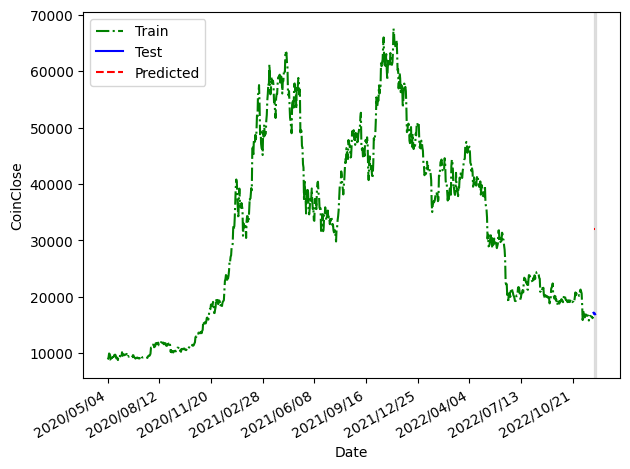

In [13]:
fig, ax = plt.subplots()

ax.plot(train['CoinDate'], train['CoinClose'], 'g-.', label='Train')
ax.plot(test['CoinDate'], test['CoinClose'], 'b-', label='Test')
ax.plot(test['CoinDate'], test['pred_mean'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('CoinClose')
ax.axvspan(940, 944, color='#808080', alpha=0.2)
ax.legend(loc=2)

plt.xticks(range(0,943,100), ['2020/05/04','2020/08/12','2020/11/20','2021/02/28','2021/06/08','2021/09/16','2021/12/25','2022/04/04','2022/07/13','2022/10/21'])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH02_F06_peixeiro.png')

# Predict last year mean 

In [30]:
last_year_mean = np.mean(train['CoinClose'][-7:])
last_year_mean

C:\Users\admin\AppData\Local\Temp\ipykernel_5472\2425409332.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  last_year_mean = np.mean(train['CoinClose'][-7:])


16352.882857142857

In [31]:
test.loc[:, 'pred__last_yr_mean'] = last_year_mean

test

,id,CoinDate,CoinOpen,CoinHigh,CoinLow,CoinClose,CoinVolume,CoinCap,pred_mean,pred__last_yr_mean
6,6,2022/11/27,16463.88,16594.41,16437.03,16444.63,2.044390e+10,3.160405e+11,32110.891217,16352.882857
5,5,2022/11/28,16440.22,16482.93,16054.53,16217.32,2.774303e+10,3.116864e+11,32110.891217,16352.882857
4,4,2022/11/29,16217.64,16522.26,16139.40,16444.98,2.358169e+10,3.160749e+11,32110.891217,16352.882857
3,3,2022/11/30,16445.48,17190.94,16445.48,17168.57,2.952358e+10,3.299976e+11,32110.891217,16352.882857
2,2,2022/12/01,17168.00,17197.50,16888.39,16967.13,2.289539e+10,3.261421e+11,32110.891217,16352.882857
1,1,2022/12/02,16968.68,17088.66,16877.88,17088.66,1.953971e+10,3.284917e+11,32110.891217,16352.882857
0,0,2022/12/03,17090.10,17116.04,16888.14,16908.24,1.621778e+10,3.250372e+11,32110.891217,16352.882857


In [32]:
mape_last_year_mean = mape(test['CoinClose'], test['pred__last_yr_mean'])
mape_last_year_mean

2.559329964935879

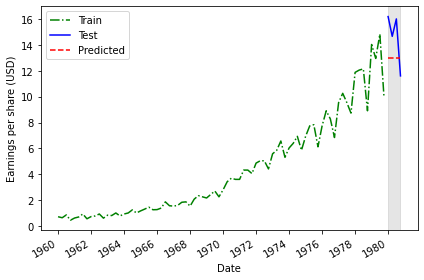

In [41]:
fig, ax = plt.subplots()

ax.plot(train['date'], train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'], 'b-', label='Test')
ax.plot(test['date'], test['pred__last_yr_mean'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='#808080', alpha=0.2)
ax.legend(loc=2)

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH02_F07_peixeiro.png', dpi=300)

# Predict last know value 

In [37]:
last = train['CoinClose'].iloc[-1]
last

16464.28

In [38]:
test.loc[:, 'pred_last'] = last

test

,id,CoinDate,CoinOpen,CoinHigh,CoinLow,CoinClose,CoinVolume,CoinCap,pred_mean,pred__last_yr_mean,pred_last
6,6,2022/11/27,16463.88,16594.41,16437.03,16444.63,2.044390e+10,3.160405e+11,32110.891217,16352.882857,16464.28
5,5,2022/11/28,16440.22,16482.93,16054.53,16217.32,2.774303e+10,3.116864e+11,32110.891217,16352.882857,16464.28
4,4,2022/11/29,16217.64,16522.26,16139.40,16444.98,2.358169e+10,3.160749e+11,32110.891217,16352.882857,16464.28
3,3,2022/11/30,16445.48,17190.94,16445.48,17168.57,2.952358e+10,3.299976e+11,32110.891217,16352.882857,16464.28
2,2,2022/12/01,17168.00,17197.50,16888.39,16967.13,2.289539e+10,3.261421e+11,32110.891217,16352.882857,16464.28
1,1,2022/12/02,16968.68,17088.66,16877.88,17088.66,1.953971e+10,3.284917e+11,32110.891217,16352.882857,16464.28
0,0,2022/12/03,17090.10,17116.04,16888.14,16908.24,1.621778e+10,3.250372e+11,32110.891217,16352.882857,16464.28


In [39]:
mape_last = mape(test['CoinClose'], test['pred_last'])
mape_last

2.15785946474227

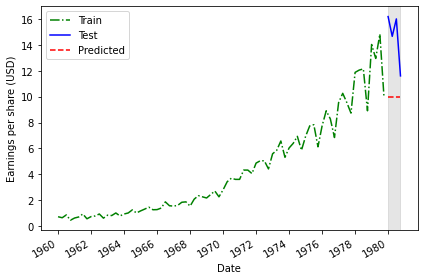

In [45]:
fig, ax = plt.subplots()

ax.plot(train['date'], train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'], 'b-', label='Test')
ax.plot(test['date'], test['pred_last'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='#808080', alpha=0.2)
ax.legend(loc=2)

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH02_F08_peixeiro.png', dpi=300)

# Naive seasonal forecast 

In [40]:
test.loc[:, 'pred_last_season'] = train['CoinClose'][-7:].values

test

C:\Users\admin\AppData\Local\Temp\ipykernel_5472\2911848882.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  test.loc[:, 'pred_last_season'] = train['CoinClose'][-7:].values


,id,CoinDate,CoinOpen,CoinHigh,CoinLow,CoinClose,CoinVolume,CoinCap,pred_mean,pred__last_yr_mean,pred_last,pred_last_season
6,6,2022/11/27,16463.88,16594.41,16437.03,16444.63,2.044390e+10,3.160405e+11,32110.891217,16352.882857,16464.28,16291.83
5,5,2022/11/28,16440.22,16482.93,16054.53,16217.32,2.774303e+10,3.116864e+11,32110.891217,16352.882857,16464.28,15787.28
4,4,2022/11/29,16217.64,16522.26,16139.40,16444.98,2.358169e+10,3.160749e+11,32110.891217,16352.882857,16464.28,16189.77
3,3,2022/11/30,16445.48,17190.94,16445.48,17168.57,2.952358e+10,3.299976e+11,32110.891217,16352.882857,16464.28,16610.71
2,2,2022/12/01,17168.00,17197.50,16888.39,16967.13,2.289539e+10,3.261421e+11,32110.891217,16352.882857,16464.28,16604.47
1,1,2022/12/02,16968.68,17088.66,16877.88,17088.66,1.953971e+10,3.284917e+11,32110.891217,16352.882857,16464.28,16521.84
0,0,2022/12/03,17090.10,17116.04,16888.14,16908.24,1.621778e+10,3.250372e+11,32110.891217,16352.882857,16464.28,16464.28


In [41]:
mape_naive_seasonal = mape(test['CoinClose'], test['pred_last_season'])
mape_naive_seasonal

2.3517412512353597

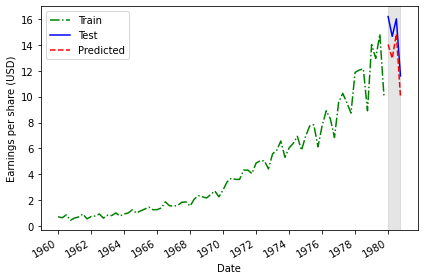

In [48]:
fig, ax = plt.subplots()

ax.plot(train['date'], train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'], 'b-', label='Test')
ax.plot(test['date'], test['pred_last_season'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='#808080', alpha=0.2)
ax.legend(loc=2)

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH02_F09_peixeiro.png', dpi=300)

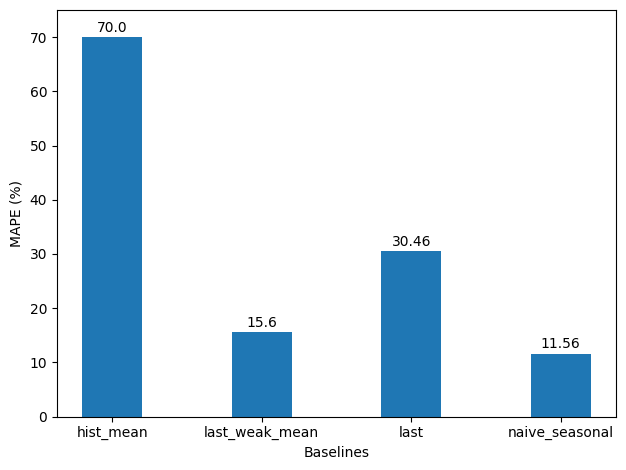

In [42]:
fig, ax = plt.subplots()

x = ['hist_mean', 'last_weak_mean', 'last', 'naive_seasonal']
y = [70.00, 15.60, 30.46, 11.56]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Baselines')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 75)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 1, s=str(value), ha='center')

plt.tight_layout()

plt.savefig('figures/CH02_F10_peixeiro.png', dpi=300)